In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
database_url = os.getenv('database_url')
weather_schema_name = 'weather'
weather_table_processed = 'weather_data_processed'

sql_statement = '''select * from {}.{}'''.format(weather_schema_name, weather_table_processed)
weather_df = pd.read_sql_query(sql_statement, database_url)
weather_df

,Hour,Date,Temp,Dew,humidity,Wind Cardinal,Wind Speed,Wind Gust,Pressure List,Precip Rate,Condition,station,Datetime
0,23:51,2012-03-08,47,42,83,SSW,12,0,30.33,0,Partly Cloudy,KJFK,2012-03-08 23:51:00
1,00:51,2012-03-08,47,42,83,S,13,0,30.32,0,Partly Cloudy,KJFK,2012-03-08 00:51:00
2,23:51,2012-01-01,47,37,68,WNW,14,0,30.01,0,Fair,KJFK,2012-01-01 23:51:00
3,00:51,2012-01-01,46,37,71,WNW,10,0,30.02,0,Fair,KJFK,2012-01-01 00:51:00
4,01:51,2012-01-01,46,37,71,WNW,10,0,30.04,0,Fair,KJFK,2012-01-01 01:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97508,14:51,2021-12-16,55,47,74,WSW,15,0,30.13,0,Mostly Cloudy,KJFK,2021-12-16 14:51:00
97509,15:51,2021-12-16,57,44,62,WSW,17,0,30.11,0,Mostly Cloudy,KJFK,2021-12-16 15:51:00
97510,16:51,2021-12-16,58,43,58,SW,14,0,30.06,0,Mostly Cloudy,KJFK,2021-12-16 16:51:00
97511,17:51,2021-12-16,59,42,53,SW,14,0,30.02,0,Mostly Cloudy,KJFK,2021-12-16 17:51:00


In [3]:
# Sorting by the date 
weather_df.sort_values('Date', inplace=True)

In [4]:
# Extracting the hour of day
weather_df["hour1"] = [x.hour for x in weather_df["Datetime"]]

# Creating the cyclical daily feature 
weather_df["day_cos"] = [np.cos(x * (2 * np.pi / 24)) for x in weather_df["hour1"]]
weather_df["day_sin"] = [np.sin(x * (2 * np.pi / 24)) for x in weather_df["hour1"]]

In [5]:
# Extracting the timestamp from the datetime object 
weather_df["timestamp"] = [x.timestamp() for x in weather_df["Datetime"]]

# Seconds in day 
s = 24 * 60 * 60

# Seconds in year 
year = (365.25) * s
weather_df["month_cos"] = [np.cos((x) * (2 * np.pi / year)) for x in weather_df["timestamp"]]
weather_df["month_sin"] = [np.sin((x) * (2 * np.pi / year)) for x in weather_df["timestamp"]]

In [6]:
del weather_df["Precip Rate"]
del weather_df["Wind Gust"]
weather_df

,Hour,Date,Temp,Dew,humidity,Wind Cardinal,Wind Speed,Pressure List,Condition,station,Datetime,hour1,day_cos,day_sin,timestamp,month_cos,month_sin
18,15:51,2012-01-01,49,40,71,S,25,29.87,Mostly Cloudy / Windy,KJFK,2012-01-01 15:51:00,15,-7.071068e-01,-0.707107,1.325433e+09,0.999996,0.002760
25,22:51,2012-01-01,49,45,86,WSW,13,29.70,Cloudy,KJFK,2012-01-01 22:51:00,22,8.660254e-01,-0.500000,1.325458e+09,0.999970,0.007777
24,21:51,2012-01-01,50,46,86,S,16,29.69,Cloudy,KJFK,2012-01-01 21:51:00,21,7.071068e-01,-0.707107,1.325455e+09,0.999975,0.007060
23,20:51,2012-01-01,49,46,90,S,21,29.71,Cloudy / Windy,KJFK,2012-01-01 20:51:00,20,5.000000e-01,-0.866025,1.325451e+09,0.999980,0.006343
22,19:51,2012-01-01,49,46,90,S,14,29.76,Cloudy,KJFK,2012-01-01 19:51:00,19,2.588190e-01,-0.965926,1.325447e+09,0.999984,0.005627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97501,07:51,2021-12-16,52,50,93,SSW,12,30.21,Cloudy,KJFK,2021-12-16 07:51:00,7,-2.588190e-01,0.965926,1.639641e+09,0.963874,-0.266358
97500,06:51,2021-12-16,51,50,96,SSW,10,30.22,Cloudy,KJFK,2021-12-16 06:51:00,6,6.123234e-17,1.000000,1.639637e+09,0.963683,-0.267048
97511,17:51,2021-12-16,59,42,53,SW,14,30.02,Mostly Cloudy,KJFK,2021-12-16 17:51:00,17,-2.588190e-01,-0.965926,1.639677e+09,0.965759,-0.259442
97504,10:51,2021-12-16,52,50,93,WSW,12,30.18,Cloudy,KJFK,2021-12-16 10:51:00,10,-8.660254e-01,0.500000,1.639652e+09,0.964445,-0.264284


In [7]:
def create_X_Y(timeseries, lag, n_ahead, target_index=0):
    """
    A method to create X and Y matrix from a time series array for the training of 
    deep learning models 
    """
    # Extracting the number of features that are passed from the array 
    n_features = timeseries.shape[1]
    # Creating placeholder lists
    X, Y = [], []
    if len(timeseries) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(timeseries) - lag - n_ahead):
            Y.append(timeseries[(i + lag):(i + lag + n_ahead), target_index])
            X.append(timeseries[i:(i + lag)])
    X, Y = np.array(X), np.array(Y)
    # Reshaping the X array to an RNN input shape 
    X = np.reshape(X, (X.shape[0], lag, n_features))
    return X, Y

timeseries = weather_df[['Temp', 'day_cos', 'day_sin', 'month_sin', 'month_cos']].values
X, Y = create_X_Y(timeseries, lag=3, n_ahead=1)

In [8]:
lag = 48 # Number of lags (hours back) to use for models
n_ahead = 1 # Steps ahead to forecast
test_div = 0.1 # Share of obs in testing
epochs = 20 # Epochs for training
batch_size = 512 # Batch size
lr = 0.001 # Learning rate
n_layer = 10 # Number of neurons in LSTM layer

# The features used in the modeling
features_final = ['Temp', 'day_cos', 'day_sin', 'month_sin', 'month_cos']

In [9]:
class neuralnet_model():
    def __init__(self, X, Y, n_outputs, n_lag, n_ft, n_layer, batch, epochs, lr,
        Xval=None, Yval=None, mask_value=-999.0, min_delta=0.001, patience=5):
        
        lstm_input = Input(shape=(n_lag, n_ft))

        # Series signal 
        lstm_layer = LSTM(n_layer, activation='relu')(lstm_input)
        x = Dense(n_outputs)(lstm_layer)
        
        self.model = models.Model(inputs=lstm_input, outputs=x)
        self.batch = batch 
        self.epochs = epochs
        self.n_layer=n_layer
        self.lr = lr 
        self.Xval = Xval
        self.Yval = Yval
        self.X = X
        self.Y = Y
        self.mask_value = mask_value
        self.min_delta = min_delta
        self.patience = patience

    def trainCallback(self):
        return EarlyStopping(monitor='loss', patience=self.patience, min_delta=self.min_delta)

    def train(self):
        # Getting the untrained model 
        empty_model = self.model
        
        # Initiating the optimizer
        optimizer = keras.optimizers.Adam(learning_rate=self.lr)

        # Compiling the model
        empty_model.compile(loss=losses.MeanAbsoluteError(), optimizer=optimizer)

        if (self.Xval is not None) & (self.Yval is not None):
            history = empty_model.fit(self.X, self.Y, 
                epochs=self.epochs, batch_size=self.batch, 
                validation_data=(self.Xval, self.Yval), 
                shuffle=False, callbacks=[self.trainCallback()])
        else:
            history = empty_model.fit(self.X, self.Y, 
                epochs=self.epochs, batch_size=self.batch,
                shuffle=False, callbacks=[self.trainCallback()])
        # Saving to original model attribute in the class
        self.model = empty_model
        # Returning the training history
        return history
    
    def predict(self, X):
        return self.model.predict(X)

In [10]:
# Subseting only the needed columns 
ts = weather_df[features_final]
nrows = ts.shape[0]

# Spliting into train and test sets
train = ts[0:int(nrows * (1 - test_div))]
test = ts[int(nrows * (1 - test_div)):]

# Scaling the data 
train_mean = train.mean()
train_std = train.std()
train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

# Creating the final scaled frame 
ts_s = pd.concat([train, test])

# Creating the X and Y for training
X, Y = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead)
n_ft = X.shape[2]

In [11]:
# Spliting into train and test sets 
Xtrain, Ytrain = X[0:int(X.shape[0] * (1 - test_div))], Y[0:int(X.shape[0] * (1 - test_div))]
Xval, Yval = X[int(X.shape[0] * (1 - test_div)):], Y[int(X.shape[0] * (1 - test_div)):]

In [12]:
#Shape of training data: (87717, 48, 5)
#Shape of the target data: (87717, 1)
#Shape of validation data: (9747, 48, 5)
#Shape of the validation target data: (9747, 1)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping

# Initiating the model object
model = neuralnet_model(X=Xtrain, Y=Ytrain, n_outputs=n_ahead, n_lag=lag,
                        n_ft=n_ft, n_layer=n_layer, batch=batch_size, epochs=epochs,
                        lr=lr, Xval=Xval, Yval=Yval,)
# Training of the model 
history = model.train()

Epoch 1/20
172/172 [==============================] - 14s 71ms/step - loss: 0.7217 - val_loss: 0.2847
Epoch 2/20
172/172 [==============================] - 12s 67ms/step - loss: 0.2882 - val_loss: 0.2573
Epoch 3/20
172/172 [==============================] - 12s 70ms/step - loss: 0.2489 - val_loss: 0.2225
Epoch 4/20
172/172 [==============================] - 12s 69ms/step - loss: 0.2240 - val_loss: 0.2032
Epoch 5/20
172/172 [==============================] - 12s 69ms/step - loss: 0.2056 - val_loss: 0.1875
Epoch 6/20
172/172 [==============================] - 12s 70ms/step - loss: 0.1942 - val_loss: 0.1802
Epoch 7/20
172/172 [==============================] - 12s 70ms/step - loss: 0.1887 - val_loss: 0.1745
Epoch 8/20
172/172 [==============================] - 12s 67ms/step - loss: 0.1747 - val_loss: 0.1746
Epoch 9/20
172/172 [==============================] - 12s 68ms/step - loss: 0.1708 - val_loss: 0.1687
Epoch 10/20
172/172 [==============================] - 12s 68ms/step - loss: 0.161

In [14]:
# Comparing the forecasts with the actual values
yhat = [x[0] for x in model.predict(Xval)]
y = [y[0] for y in Yval]

# Creating the frame to store both predictions
days = weather_df["Datetime"].values[-len(y):]
frame = pd.concat([
 pd.DataFrame({'day': days, 'Temp': y, 'type': 'original'}),
 pd.DataFrame({'day': days, 'Temp': yhat, 'type': 'forecast'})
])

# Creating the unscaled values column
frame['temp_absolute'] = [(x * train_std['Temp']) + train_mean['Temp'] for x in frame['Temp']]

# Pivoting
pivoted = frame.pivot_table(index='day', columns='type')
pivoted.columns = ['_'.join(x).strip() for x in pivoted.columns.values]
pivoted['res'] = pivoted['temp_absolute_original'] - pivoted['temp_absolute_forecast']
pivoted['res_abs'] = [abs(x) for x in pivoted['res']]

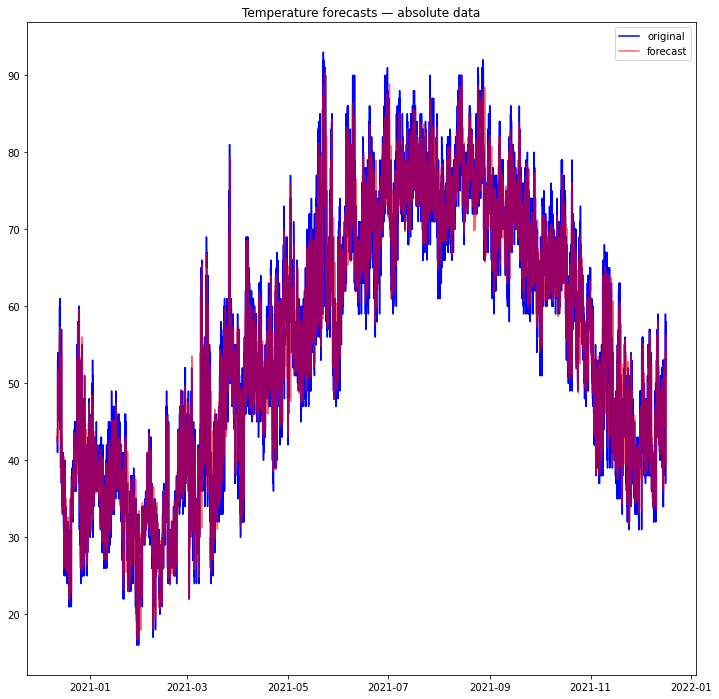

In [15]:
plt.figure(figsize=(12, 12))
plt.plot(pivoted.index, pivoted.temp_absolute_original, color='blue', label='original')
plt.plot(pivoted.index, pivoted.temp_absolute_forecast, color='red', label='forecast', alpha=0.6)
plt.title('Temperature forecasts — absolute data')
plt.legend()
plt.show()